# Exam

In [104]:
import pandas as pd
import numpy as np
import myhelpers.preprocessing as prepro
import myhelpers.visualisation as viz

In [105]:
data = pd.read_csv("measurements.csv", na_values=["nan"])

In [106]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [107]:
data.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
distance         388 non-null object
consume          388 non-null object
speed            388 non-null int64
temp_inside      376 non-null object
temp_outside     388 non-null int64
specials         93 non-null object
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill liters    13 non-null object
refill gas       13 non-null object
dtypes: int64(5), object(7)
memory usage: 25.8+ KB


In [109]:
data.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [110]:
prepro.fillNaWithMeanMode(data)
data = prepro.input_missing_values(data)

In [111]:
prepro.turnValidFloat(data, 'distance')

In [112]:
prepro.turnValidFloat(data, 'consume')

In [113]:
prepro.turnValidFloat(data, 'temp_inside')

In [114]:
prepro.turnValidFloat(data, 'refill liters')

In [115]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,21.5,12,rain,E10,0,0,0,45,E10
1,12,4.2,30,21.5,13,rain,E10,0,0,0,39,SP98
2,11.2,5.5,38,21.5,15,rain,E10,0,0,0,45,SP98
3,12.9,3.9,36,21.5,14,rain,E10,0,0,0,39,SP98
4,18.5,4.5,46,21.5,15,rain,E10,0,0,0,39,SP98


In [116]:
data['distance'] = prepro.typeToFloat(data, 'distance')
data['consume'] = prepro.typeToFloat(data, 'consume')
data['consume'] = prepro.typeToFloat(data, 'refill liters')
#data['temp_inside'] = prepro.typeToFloat(data, 'temp_inside')

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
distance         388 non-null object
consume          388 non-null object
speed            388 non-null int64
temp_inside      388 non-null object
temp_outside     388 non-null int64
specials         388 non-null object
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill liters    388 non-null object
refill gas       388 non-null object
dtypes: int64(5), object(7)
memory usage: 25.8+ KB


In [118]:
data.isnull().sum()

distance         0
consume          0
speed            0
temp_inside      0
temp_outside     0
specials         0
gas_type         0
AC               0
rain             0
sun              0
refill liters    0
refill gas       0
dtype: int64

In [119]:
data.shape

(388, 12)

In [120]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,28,26,21.5,12,rain,E10,0,0,0,45,E10
1,12,12,30,21.5,13,rain,E10,0,0,0,39,SP98
2,11.2,11.2,38,21.5,15,rain,E10,0,0,0,45,SP98
3,12.9,12.9,36,21.5,14,rain,E10,0,0,0,39,SP98
4,18.5,18.5,46,21.5,15,rain,E10,0,0,0,39,SP98


In [121]:
data[data['refill gas'] == 'E10' ].head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,28,26,21.5,12,rain,E10,0,0,0,45,E10
139,16.1,16.1,24,21.5,7,rain,E10,0,1,0,38,E10
171,44.4,44.4,38,21.5,8,rain,E10,0,0,0,38.3,E10
234,19,19,29,22.5,10,rain,E10,0,0,0,39,E10
325,16.6,16.6,49,22,17,rain,E10,0,0,0,37.7,E10


In [122]:
data['refill gas'] = data['refill gas'].fillna(data['gas_type'])

In [123]:
data['refill gas'].isnull().sum()

0

In [124]:
data.isnull().sum()

distance         0
consume          0
speed            0
temp_inside      0
temp_outside     0
specials         0
gas_type         0
AC               0
rain             0
sun              0
refill liters    0
refill gas       0
dtype: int64

In [125]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,28,26,21.5,12,rain,E10,0,0,0,45,E10
1,12,12,30,21.5,13,rain,E10,0,0,0,39,SP98
2,11.2,11.2,38,21.5,15,rain,E10,0,0,0,45,SP98
3,12.9,12.9,36,21.5,14,rain,E10,0,0,0,39,SP98
4,18.5,18.5,46,21.5,15,rain,E10,0,0,0,39,SP98


In [126]:
data['gas_type'].unique()

array(['E10', 'SP98'], dtype=object)

In [127]:
e10 = data[data['gas_type'] == 'E10']
sp98 = data[data['gas_type'] == 'SP98']

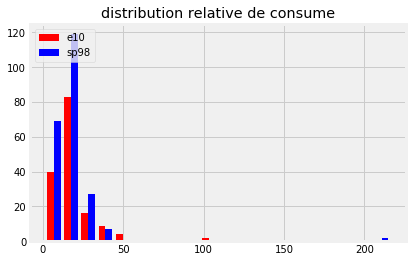

In [128]:
viz.plot_hist("consume", e10, sp98, "e10", "sp98")

### Exercice 1:



faire l'inventaire du nombre de lignes et de colonnes du data set.

Calculer la moyenne et l'ecart type des variables quantitative en fonction du type de
carburant

Y'a t il une diérence signicative entre la consommation dans les deux types de
carburant?

 Quelles sont les variables qui contiennent des valeurs manquantes et quelle est la proportion des valeurs manquantes pour chacune de ces variables?

Calculer ainsi la matrice X constituée des variables explicatives et la cible Y . Ensuite
découper les observations en Xtrain, Ytrain, Xtest, Ytest, ou la première partie servira de
base d'apprentissage et la seconde de base de test.

In [129]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,28,26,21.5,12,rain,E10,0,0,0,45,E10
1,12,12,30,21.5,13,rain,E10,0,0,0,39,SP98
2,11.2,11.2,38,21.5,15,rain,E10,0,0,0,45,SP98
3,12.9,12.9,36,21.5,14,rain,E10,0,0,0,39,SP98
4,18.5,18.5,46,21.5,15,rain,E10,0,0,0,39,SP98


In [147]:
y = data[['consume']]

In [148]:
X = data.copy().drop('consume', axis=1)
X = X[['distance', 'speed', 'AC', 'rain', 'sun', 'temp_inside', 'temp_outside', 'gas_type', 'refill liters']]
X = prepro.addDummies(X, 'gas_type')

In [149]:
X.head()

,distance,speed,AC,rain,sun,temp_inside,temp_outside,refill liters,gas_type_E10,gas_type_SP98
0,28,26,0,0,0,21.5,12,45,1,0
1,12,30,0,0,0,21.5,13,39,1,0
2,11.2,38,0,0,0,21.5,15,45,1,0
3,12.9,36,0,0,0,21.5,14,39,1,0
4,18.5,46,0,0,0,21.5,15,39,1,0


Mettre en place un modele d'apprentissage pour prédire la consommation.

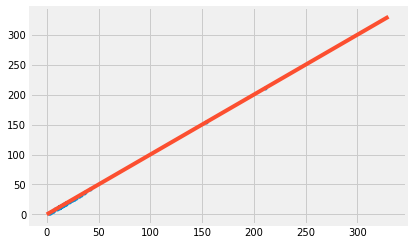

In [150]:
import myhelpers.modelisation as hm

model_reg_lin = hm.get_model_RegLin(X, y)

In [151]:
model_reg_lin["score_test"]

1.0

In [152]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [154]:
model.score(X_test, y_test)

1.0

In [155]:
y_pred = model.predict(X_test) 

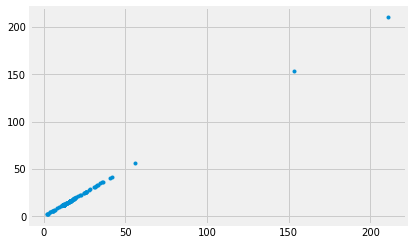

In [156]:
import matplotlib.pyplot as plt

plt.plot(y_test, y_pred, '.')

tester plusieurs modèles et plusieurs combinaisons de paramètres an de fournir le
modèle avec la meilleure prédiction. On dénira de facon claire et précise les méthodes
d'évaluation de modèles mis en place.


In [157]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.values.reshape(-1, 1))

from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X,y)

y_pred = regressor.predict(X_test)

d:\python\python36-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
d:\python\python36-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
d:\python\python36-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
d:\python\python36-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
d:\python\python36-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed whe

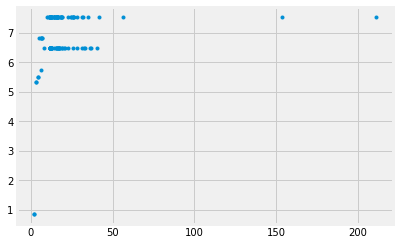

In [166]:
plt.plot(y_test, y_pred, '.')

In [173]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#X, y = make_regression(n_features=4, n_informative=2,
 #                       random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=24, random_state=0)
regr.fit(X, y)

d:\python\python36-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
d:\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=24,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [174]:
y_pred = regr.predict(X_test)

In [175]:
regr.score(X_test, y_test)

-0.22891029837084687